In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
from sklearn.metrics import r2_score

In [2]:
df = pd.read_spss("C:\\Users\\Asus\\Documents\\PYTHON CODE\\TAMIL_NADU\\Tamilnadu_cnns_1.sav")

In [3]:
df.shape

(1861, 121)

## Data preprocessing

In [4]:
df['state_weight_survey'] = df['state_weight_survey'].round(2)
df['state_weight_survey'] = df['state_weight_survey'] * 100
df['state_weight_survey'] = df['state_weight_survey'].astype(int)
new_df = df.loc[np.repeat(df.index.values, df['state_weight_survey'])]

# reset the index of the new DataFrame
new_df = new_df.reset_index(drop=True)

In [5]:
new_df.shape

(186044, 121)

In [6]:
new_df['hgbn_alt_unic'].isnull().sum()

125063

In [7]:
new_df['hgbn_alt_unic'] = pd.to_numeric(new_df['hgbn_alt_unic'], errors='coerce')
#new_df = new_df.dropna(subset=['hgbn_alt_unic'])

In [8]:
new_df_1 = new_df.dropna(subset=['hgbn_alt_unic'])
corr = new_df_1.corr()['hgbn_alt_unic']
corr_sorted = corr.sort_values(ascending=False)

In [9]:
corr_sorted # muac,q901r1,wc,height,ssft

hgbn_alt_unic          1.000000
q113y                  1.000000
q902r2                 0.312857
q902r1                 0.301400
height                 0.301234
z_tsft                 0.205368
q901r1                 0.198141
agemons                0.167059
bp_sys1                0.166430
q104                   0.156873
bp_sys2                0.151160
q903r1                 0.138476
muac                   0.137816
q903r2                 0.137145
z_ssft                 0.112614
reg_weight_bio         0.069745
nat_weight_bio         0.069745
q906r2                 0.067339
wc                     0.067181
q906r1                 0.067022
state_weight_bio       0.066304
nat_weight_survey      0.047091
reg_weight_survey      0.047091
@_zhfa                 0.046580
bp_sys3                0.043978
state_weight_survey    0.039599
@_cbmi                 0.034776
hh_no                  0.028245
int_d                  0.027516
bp_dysys1              0.023446
bp_dysys2              0.023079
psu_no  

In [10]:
subset_df = new_df_1[['hgbn_alt_unic','q901r1','muac','tsft','q102']] # haemoglobin, bmi, low average,height
# BMI-for-age Z score, (muac,weight,height), wealth index,nutritional intake - mean vit A, mean iron

In [11]:
subset_df['q102'].value_counts()

male      30309
female    28555
Name: q102, dtype: int64

In [12]:
subset_df.q102 = subset_df.q102.map({'male':1,'female':2})

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
subset_df.head()

,hgbn_alt_unic,q901r1,muac,tsft,q102
191,13.4,79.0,34.75,21.5,1
192,13.4,79.0,34.75,21.5,1
193,13.4,79.0,34.75,21.5,1
194,13.4,79.0,34.75,21.5,1
195,13.4,79.0,34.75,21.5,1


In [14]:
subset_df.dropna(inplace=True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [15]:
subset_df.describe()

,hgbn_alt_unic,q901r1,muac,tsft
count,57231.000000,57231.000000,57231.000000,57231.000000
mean,13.099221,43.794910,22.762154,10.262686
std,1.747711,13.439347,4.125284,4.386778
min,3.900000,2.000000,8.300000,3.800000
25%,12.200000,34.900000,19.950001,7.000000
50%,13.200000,42.000000,22.549999,9.200000
75%,14.100000,51.800000,25.250000,12.700000
max,17.700001,93.800000,38.549999,31.700001


## Exploratory Data Analysis


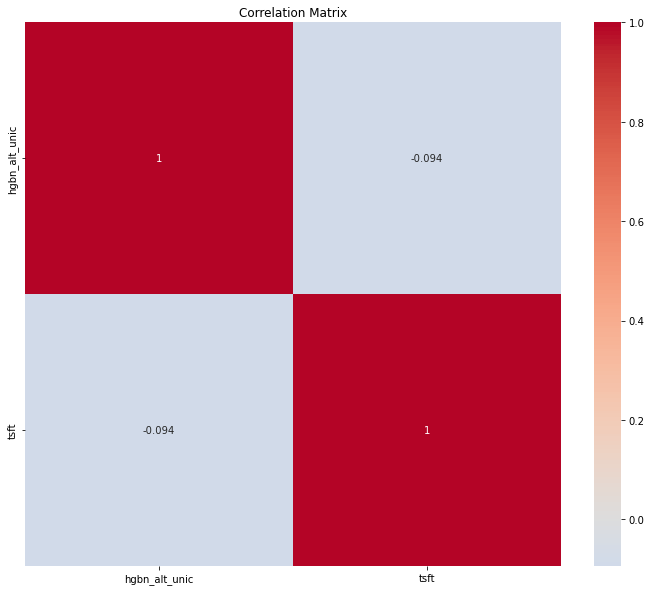

In [16]:
subset_df1 = subset_df[['hgbn_alt_unic','tsft']]
corr_matrix = subset_df1.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [17]:
# count missing values by age
missing_values_by_gender = new_df.groupby('q102')['hgbn_alt_unic'].apply(lambda x: x.isnull().sum())


# print the resulting series
print(missing_values_by_gender)

q102
female    66948
male      60232
Name: hgbn_alt_unic, dtype: int64


In [18]:
new_df['q102'].value_counts()

female    95503
male      90541
Name: q102, dtype: int64

Text(0.5, 1.0, 'Box Plot of hgbn_alt_unic by q102')

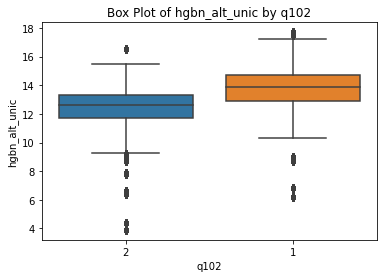

In [19]:
sns.boxplot(x='q102', y='hgbn_alt_unic', data=subset_df)
plt.title('Box Plot of hgbn_alt_unic by q102')

Text(0.5, 1.0, 'Box Plot of tsft by q102')

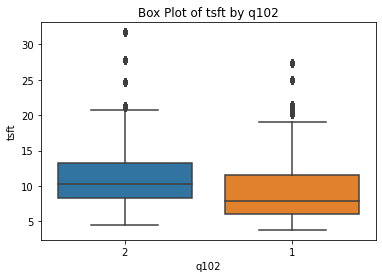

In [20]:
sns.boxplot(x='q102', y='tsft', data=subset_df)
plt.title('Box Plot of tsft by q102')

In [50]:
new_df['wi'].value_counts()

Richest    88551
Rich       54698
Middle     29282
Poor       11635
Poorest     1878
Name: wi, dtype: int64

In [52]:
new_df_1['wi'].value_counts()

Richest    25154
Rich       16683
Middle     10641
Poor        5620
Poorest      766
Name: wi, dtype: int64

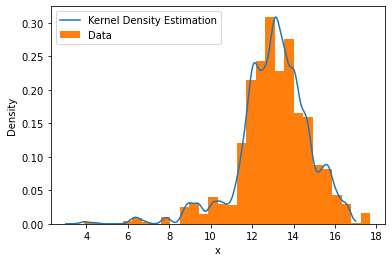

In [21]:
from scipy.stats import gaussian_kde

# Generate data
data = subset_df['hgbn_alt_unic']

# Estimate the pdf
kde = gaussian_kde(data)

# Generate points and evaluate the pdf
x = np.linspace(3, 17, 10000)
pdf = kde.evaluate(x)

# Plot the data and the estimated pdf
import matplotlib.pyplot as plt
plt.plot(x, pdf, label='Kernel Density Estimation')
plt.hist(data, 30, density=True, label='Data')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## OLS Regression

In [22]:
X = subset_df[['tsft','q102','muac']]
Y = subset_df['hgbn_alt_unic']
X = sm.add_constant(X) #adding constant
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = sm.OLS(y_train,X_train).fit()
y_pred_ols = model.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
X.columns

Index(['const', 'tsft', 'q102'], dtype='object')

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          hgbn_alt_unic   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     4826.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:49:19   Log-Likelihood:                -85948.
No. Observations:               45784   AIC:                         1.719e+05
Df Residuals:                   45781   BIC:                         1.719e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2642      0.027    575.654      0.000      15.212      15.316
tsft          -0.0006      0.002     -0.356      0.722      -0.004       0.003
q102          -1.4518      0.015    -95.910      0.000      -1.482      -1.422
==============================================================================
Omnibus:                     9439.967   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31959.994
Skew:                          -1.033   Prob(JB):                         0.00
Kurtosis:                       6.534   Cond. No.                         44.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
mse = mean_squared_error(y_test, y_pred_ols)
print("Mean squared error: ", mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Mean squared error:  2.598966162046846
Root mean squared error:  1.6121309382450442


In [26]:
r2 = r2_score(y_test, y_pred_ols)
print("R2 score: ", r2)

R2 score:  0.1774000043552998


In [27]:
#We need to check for heteroskedasticity
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 64.37920225423849, 'Test Statistic p-value': 3.4772497847397313e-13, 'F-Statistic': 16.115703983168306, 'F-Test p-value': 3.410983492014918e-13}


In [28]:
X = subset_df[['tsft','q102']]
Y = subset_df['hgbn_alt_unic']
X = sm.add_constant(X) #adding constant
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_1 = sm.OLS(y_train,X_train).fit(cov_type='HC3')
y_pred_ols = model.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          hgbn_alt_unic   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     4817.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:49:19   Log-Likelihood:                -85948.
No. Observations:               45784   AIC:                         1.719e+05
Df Residuals:                   45781   BIC:                         1.719e+05
Df Model:                           2                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2642      0.025    598.682      0.000      15.214      15.314
tsft          -0.0006      0.002     -0.379      0.705      -0.004       0.003
q102          -1.4518      0.015    -95.237      0.000      -1.482      -1.422
==============================================================================
Omnibus:                     9439.967   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31959.994
Skew:                          -1.033   Prob(JB):                         0.00
Kurtosis:                       6.534   Cond. No.                         44.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

## Kernel Regression

In [30]:
from statsmodels.nonparametric.kernel_regression import KernelReg

In [46]:
X = subset_df[['tsft','q102']] #'q901r1','wc','height',,'ssft'
Y = subset_df['hgbn_alt_unic']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
kr = KernelReg(endog=y_train, exog=X_train , var_type='co',reg_type='lc')

In [47]:
print(kr.bw)

[3.48955638e+07 1.22612622e-01]


In [48]:
y_pred_kr, mar = kr.fit(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred_kr)
print("Mean squared error: ", mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Mean squared error:  2.632378712267011
Root mean squared error:  1.6224606966786626
